In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**********Welcome To The Expense Manager**********


Expense added successfully for User r1!

Your Expense Report:
 User_ID       Date  Amount Category Description
     r1 01/02/8200      63        f       fdfdf


C:\Users\HASNAIN\AppData\Local\Temp\ipykernel_27304\133367866.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_data["Category"], y=user_data["Amount"], palette="viridis")


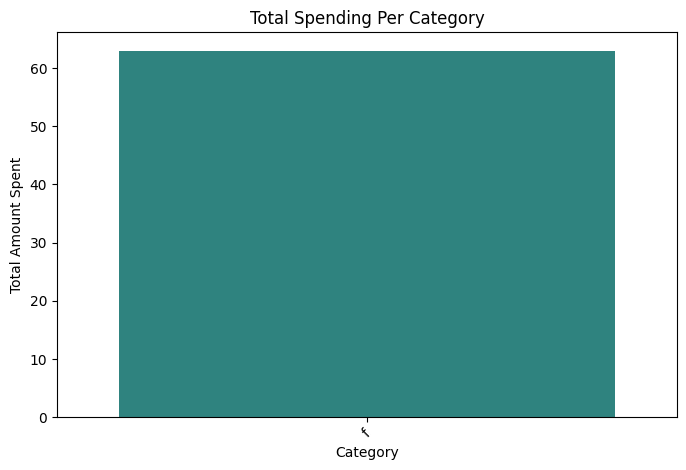

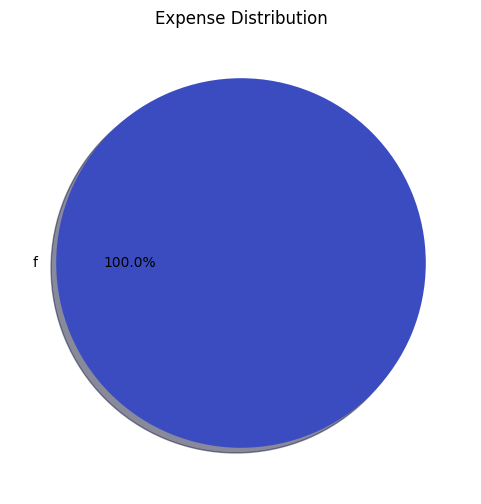

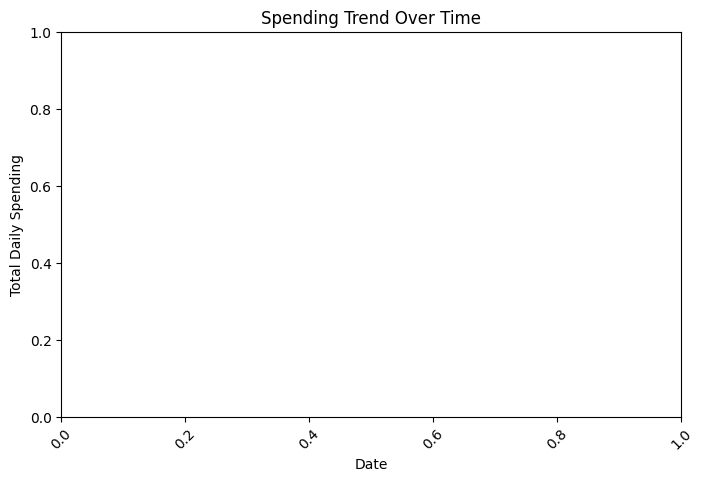

Exiting Expense Manager for User r1. Goodbye!


In [12]:
import pandas as pd

title = "Welcome To The Expense Manager"
print(title.center(50, '*'))

main_file = "DATASET.csv"

if not pd.io.common.file_exists(main_file):
    pd.DataFrame(columns=["User_ID", "Date", "Amount", "Category", "Description"]).to_csv(main_file, index=False)

class ExpenseTracker:
    def __init__(self, user_id):
        self.user_id = user_id

    def add_expense(self, date, amount, category, description):
        new_expense = pd.DataFrame([[self.user_id, date, amount, category, description]],
                                   columns=["User_ID", "Date", "Amount", "Category", "Description"])
        new_expense.to_csv(main_file, mode='a', header=False, index=False)
        print(f"Expense added successfully for User {self.user_id}!")

    def show_report(self):
        try:
            df = pd.read_csv(main_file)
            user_data = df[df["User_ID"] == self.user_id]
            
            if user_data.empty:
                print("No records found!")
                return

            user_data["Amount"] = pd.to_numeric(user_data["Amount"], errors="coerce")
            user_data.dropna(inplace=True)

            print("\nYour Expense Report:\n", user_data.to_string(index=False))

            # Visualization: Total Spending per Category
            import matplotlib.pyplot as plt
            import seaborn as sns
            plt.figure(figsize=(8, 5))
            sns.barplot(x=user_data["Category"], y=user_data["Amount"], palette="viridis")
            plt.xlabel("Category")
            plt.ylabel("Total Amount Spent")
            plt.title("Total Spending Per Category")
            plt.xticks(rotation=45)
            plt.show()

            # Pie Chart of Spending
            plt.figure(figsize=(6, 6))
            user_data.groupby("Category")["Amount"].sum().plot(kind="pie", autopct="%1.1f%%", cmap="coolwarm", shadow=True)
            plt.title("Expense Distribution")
            plt.ylabel("")  # Hide y-axis label
            plt.show()

            # Spending Over Time
            user_data["Date"] = pd.to_datetime(user_data["Date"], dayfirst=True, errors="coerce")
            user_data.dropna(subset=["Date"], inplace=True)
            daily_expense = user_data.groupby("Date")["Amount"].sum()

            plt.figure(figsize=(8, 5))
            sns.lineplot(x=daily_expense.index, y=daily_expense.values, marker="o", color="blue")
            plt.xlabel("Date")
            plt.ylabel("Total Daily Spending")
            plt.title("Spending Trend Over Time")
            plt.xticks(rotation=45)
            plt.show()

        except Exception as e:
            print(f"Error: {e}")

    def delete_entry(self):
        try:
            df = pd.read_csv(main_file)
            user_data = df[df["User_ID"] == self.user_id]
            if user_data.empty:
                print("No records found!")
                return
            
            print("\nYour Expenses:\n", user_data.to_string(index=True))
            index = int(input("Enter the row number of the entry to delete: "))

            if index not in user_data.index:
                print("Invalid index!")
                return

            df = df.drop(index)
            df.to_csv(main_file, index=False)
            print("Expense deleted successfully!")

        except Exception as e:
            print(f"Error: {e}")

    def filter_expenses(self):
        try:
            df = pd.read_csv(main_file)
            user_data = df[df["User_ID"] == self.user_id]
            if user_data.empty:
                print("No records found!")
                return

            filter_choice = input("Filter by (1) Date or (2) Category? ")
            if filter_choice == "1":
                date = input("Enter date (dd/mm/yyyy): ")
                result = user_data[user_data["Date"] == date]
            elif filter_choice == "2":
                category = input("Enter category: ")
                result = user_data[user_data["Category"] == category]
            else:
                print("Invalid choice!")
                return

            if result.empty:
                print("No records found for the given filter!")
            else:
                print("\nFiltered Expenses:\n", result.to_string(index=False))

        except Exception as e:
            print(f"Error: {e}")

# Ask for user ID when starting the program
user_id = input("Enter your User ID: ")
tracker = ExpenseTracker(user_id)

# Main Menu
while True:
    main_menu = input('''\n1. Add new expense 
2. Delete entry
3. Show report 
4. Filter expenses
5. Exit
Enter your choice: ''')

    if main_menu == "1":
        date = input("Enter date (dd/mm/yyyy): ")
        amount = input("Enter amount: ")
        category = input("Enter category: ")
        description = input("Enter description (20 words only): ")
        tracker.add_expense(date, amount, category, description)

    elif main_menu == "2":
        tracker.delete_entry()

    elif main_menu == "3":
        tracker.show_report()

    elif main_menu == "4":
        tracker.filter_expenses()

    elif main_menu == "5":
        print(f"Exiting Expense Manager for User {user_id}. Goodbye!")
        break

    else:
        print("Invalid choice! Please enter a valid option.")
